# RTS and market indicators
https://www.moex.com/ru/index/stat/dailyhistory.aspx?code=RTSI


In [168]:
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

import re
import numpy as np
import time

strURLBase=r'https://www.moex.com/ru/index/stat/dailyhistory.aspx?code=RTSI'

In [14]:
strURL_RTS_semi=r'https://www.moex.com/ru/index/stat/dailyhistorycsv.aspx?type=2&code=RTSI&day1=19950901&day2=20181022&frmSessR=0'
strURL_RTS_comma=r'https://www.moex.com/ru/index/stat/dailyhistorycsv.aspx?code=RTSI&day1=19950901&day2=20181022&frmSessR=0'

pdRTS=pd.read_csv(strURL_RTS_comma, encoding='cp1251', sep=',', index_col='Date')
pdRTS.astype(float)
pdRTS.index=pd.to_datetime(pdRTS.index, format='%d.%m.%Y')
pdRTS=pdRTS[['Open', 'Max', 'Min', 'Close', 'Trading Volume, USD', 'Market Capitalization, USD']]
print(pdRTS.shape)
print(pdRTS.head(10))

(5787, 6)
               Open      Max      Min    Close  Trading Volume, USD  \
Date                                                                  
2018-10-19  1139.87  1141.90  1124.78  1126.97          730244208.0   
2018-10-18  1158.69  1158.69  1137.65  1140.17          468918012.0   
2018-10-17  1168.53  1173.84  1153.94  1162.79          549053195.0   
2018-10-16  1145.53  1166.65  1144.30  1165.87          516041542.0   
2018-10-15  1146.14  1155.89  1139.66  1146.72          427792802.0   
2018-10-12  1127.46  1149.43  1127.46  1141.35          542823287.0   
2018-10-11  1123.66  1132.36  1112.49  1124.08          909982426.0   
2018-10-10  1162.79  1169.85  1139.25  1143.35          634977466.0   
2018-10-09  1163.93  1175.98  1156.38  1159.47          654154921.0   
2018-10-08  1159.20  1165.35  1147.46  1158.25          530735965.0   

            Market Capitalization, USD  
Date                                    
2018-10-19                1.524996e+11  
2018-10-18    

## Grouping and calculations

In [27]:
pdfg=pdRTS.groupby(pd.Grouper(freq='M'))
pdfRTS_monthly=pdfg[['Open', 'Min', 'Max', 'Close']].mean()
print(pdfRTS_monthly.tail(10))

pdfRTS_m_average=pdfRTS_monthly[['Min', 'Max']].mean(axis=1)
pdfRTS_m_average.name='RTS, monthly average'
print(pdfRTS_m_average.tail(10))

pdfRTS_volume=pdfg.agg({'Trading Volume, USD':'sum', 'Market Capitalization, USD':'mean'})
print(pdfRTS_volume.tail(10))

                   Open          Min          Max        Close
Date                                                          
2018-01-31  1254.986500  1247.059500  1266.575500  1261.160000
2018-02-28  1259.306316  1249.796316  1270.540000  1260.088421
2018-03-31  1262.780476  1250.326190  1270.213333  1260.000952
2018-04-30  1162.565909  1142.054091  1172.299091  1155.866818
2018-05-31  1170.930476  1161.545238  1179.331429  1169.859048
2018-06-30  1138.412381  1130.163333  1147.196667  1137.927619
2018-07-31  1157.082273  1148.633636  1166.299545  1160.069545
2018-08-31  1091.724783  1078.505217  1099.426522  1088.789565
2018-09-30  1105.750000  1099.440500  1116.924000  1110.531500
2018-10-31  1161.004667  1148.675333  1170.128000  1157.202000
Date
2018-01-31    1256.817500
2018-02-28    1260.168158
2018-03-31    1260.269762
2018-04-30    1157.176591
2018-05-31    1170.438333
2018-06-30    1138.680000
2018-07-31    1157.466591
2018-08-31    1088.965870
2018-09-30    1108.182250
2018-

## Plotting

<IPython.core.display.Javascript object>


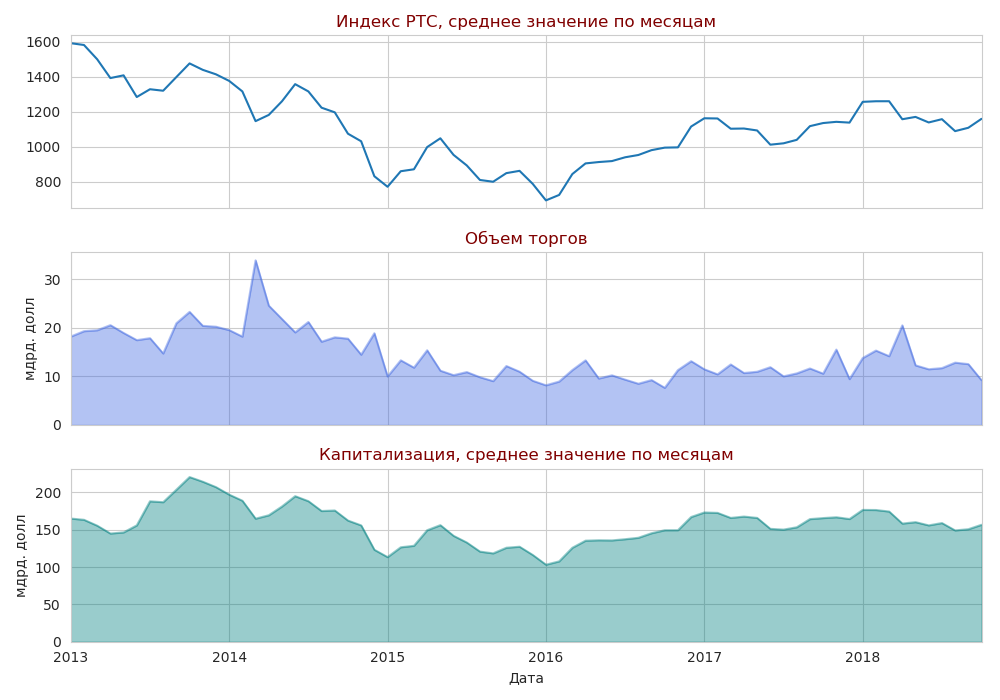

In [117]:
%matplotlib notebook
#import matplotlib.patches as mpatches

import seaborn as sns
sns.set_style('whitegrid')

fig, (ax1, ax2, ax3)=plt.subplots(figsize=(10,7), nrows=3, ncols=1, sharex=True)

lBaseYear=2013

pdfRTS_m_average.loc[pdfRTS_m_average.index.year>=lBaseYear].plot.line(ax=ax1)

pdfRTS_vol=pdfRTS_volume.loc[pdfRTS_volume.index.year>=lBaseYear, ('Trading Volume, USD')]/1e9
pdfRTS_vol.plot.area(ax=ax2, color='royalblue', alpha=0.4)

pdfRTS_cap=pdfRTS_volume.loc[pdfRTS_volume.index.year>=lBaseYear, ('Market Capitalization, USD')]/1e9
pdfRTS_cap.plot.area(ax=ax3, xlim=(pd.Timestamp('{year}-01-01'.format(year=lBaseYear)), datetime.now()), color='teal', alpha=0.4)

ax1.set_title('Индекс РТС, среднее значение по месяцам', fontsize=12, color='maroon')
ax2.set_title('Объем торгов', fontsize=12, color='maroon')
ax3.set_title('Капитализация, среднее значение по месяцам', fontsize=12, color='maroon', )

ax3.set_xlabel('Дата')
ax2.set_ylabel('мдрд. долл')
ax3.set_ylabel('мдрд. долл')

plt.tight_layout()
plt.show();
plt.savefig(r'/home/egor/Изображения/RTS.png')

# Индекс МосБиржи IMOEX (ранее - Индекс ММВБ) 

In [129]:
from bs4 import BeautifulSoup
import sqlite3
import requests
import sqlalchemy as sa
import xml.etree.ElementTree as ET

#print(get_date_list(1987)) # check import serv_energy

#conn=sqlite3.connect('fuels.sqlite3')

%run 'serv_pd.py'

eng_co=sa.create_engine('sqlite+pysqlite:///imoex.sqlite3') #, echo=True)

In [ ]:
#save RTS historical value, for some reasons

rts=RTSDataFrame(pdRTS)
rts.index_to_string()
rts.to_sql('RTS', con=eng_co, if_exists='upsert')

## Read IMOEX from https://www.moex.com/
https://www.moex.com/ru/index/IMOEX/archive/#/from=2000-01-01&till=2018-10-01&sort=TRADEDATE&order=desc

In [219]:
strIMOEX=r'https://www.moex.com/ru/index/IMOEX/archive/#/from={start_y}-{start_m:02d}-{start_d:02d}&till={end_y}-{end_m:02d}-{end_d:02d}&sort=TRADEDATE&order=desc'
strMOEX_xml=r'https://iss.moex.com/iss/history/engines/stock/markets/index/securities/IMOEX.xml?iss.only=history&iss.dp=comma&iss.df=%25Y-%25m-%25d&iss.tf=%25H%3A%25M%3A%25S&iss.dtf=%25Y.%25m.%25d%20%25H%3A%25M%3A%25S&iss.json=extended&callback=JSON_CALLBACK&from={start_y}-{start_m:02d}-{start_d:02d}&till={end_y}-{end_m:02d}-{end_d:02d}&limit={limit}&start={start}&sort_order=TRADEDATE&sort_order_desc={order}'

strIMOEX_base=strIMOEX.format(start_y=2000, start_m=1, start_d=1, 
                      end_y=datetime.now().year, end_m=datetime.now().month, end_d=datetime.now().day)

strIMOEX_xml_base=strMOEX_xml.format(start_y=2000, start_m=1, start_d=1, 
                    end_y=datetime.now().year, end_m=datetime.now().month, end_d=datetime.now().day, 
                    limit=100, start=0, order='asc')

lst_work_cols=['TRADEDATE', 'OPEN', 'CLOSE', 'HIGH', 'LOW', 'VALUE', 'CAPITALIZATION']

def get_work_xml_string(start_y=2000, start_m=1, start_d=1, 
                    end_y=datetime.now().year, end_m=datetime.now().month, end_d=datetime.now().day, 
                    limit=100, start=0, order='asc'):
    return strMOEX_xml.format(start_y=start_y, start_m=start_m, start_d=start_d, 
                    end_y=end_y, end_m=end_m, end_d=end_d, limit=limit, start=start, order=order)

    

def get_part_imoex(strURL=strIMOEX_xml_base):
    sessMOEX=requests.session()
    wb_html=sessMOEX.get(strURL)
    
    root=ET.fromstring(wb_html.content)
    lst=[ {k:v for (k, v) in row.attrib.items() if k in lst_work_cols} for row in root.iter('row')]
    
    pdf=None
    try:
        if lst != []:
            pdf=pd.DataFrame(lst)[lst_work_cols]
    except:
        print(lst)

    return pdf
    
#pdfMOEX=get_part_imoex()
#print(datetime.strptime(pdfMOEX.tail(1)['TRADEDATE'].values[0], '%Y-%m-%d'))
#print(get_work_xml_string(limit=100, start=100))

def read_xml_table(start_date=datetime(2000, 1, 1), sorting='asc'):
    def to_float(x):
        try:
            return float(x.strip().replace(',', '.'))
        except:
            return np.nan

    moex=pd.DataFrame(columns=lst_work_cols)
    moex_ls=[]

    cur_dt=start_date
    tdd=timedelta(days=1)

    page_start=0

    while(cur_dt<=datetime.now()):
        moex_ls.append(get_part_imoex(strURL=get_work_xml_string(start=page_start, 
                                                                 order=sorting, start_y=start_date.year, 
                                                                 start_m=start_date.month, start_d=start_date.day)))
        try:
            cur_dt=datetime.strptime(moex_ls[-1].tail(1)['TRADEDATE'].values[0], '%Y-%m-%d')
        except AttributeError:
            break
        time.sleep(5)
        print(cur_dt)
        page_start+=100
    
    moex=RTSDataFrame(pd.concat(moex_ls).rename(columns={'TRADEDATE':'Date'}).set_index('Date'))
    moex.index_to_datetime(format='%Y-%m-%d')
    moex.index_to_string(format='%d-%m-%Y')

    moex=moex.applymap(lambda x: to_float(x))
    return moex

# for make whole table
#moex_whole = read_xml_table()
#moex_whole.to_sql('IMOEX', con=eng_co, if_exists='upsert')

#print(moex_whole.tail(10))

#for update table IMOEX
moex_update=read_xml_table(start_date=datetime.now()-timedelta(days=50), sorting='desc')
moex_update.to_sql('IMOEX', con=eng_co, if_exists='upsert')
print(moex_update.head(10))

2018-09-03 00:00:00
               OPEN    CLOSE     HIGH      LOW         VALUE  CAPITALIZATION
Date                                                                        
14-09-2018  2359.06  2360.26  2369.06  2345.51  4.226312e+10    1.009688e+13
13-09-2018  2339.40  2357.32  2373.61  2339.40  5.893565e+10    1.008429e+13
12-09-2018  2339.77  2340.63  2350.00  2328.28  4.021891e+10    1.001291e+13
11-09-2018  2336.16  2335.19  2345.65  2314.80  4.405081e+10    9.989643e+12
10-09-2018  2322.67  2335.85  2335.85  2320.04  3.451479e+10    9.992457e+12
07-09-2018  2321.66  2321.82  2330.84  2305.27  3.267006e+10    9.932444e+12
06-09-2018  2320.08  2320.65  2342.02  2320.08  2.964688e+10    9.927439e+12
05-09-2018  2333.04  2321.33  2341.37  2321.33  2.614134e+10    9.930359e+12
04-09-2018  2348.65  2336.38  2358.88  2332.34  2.642538e+10    9.994710e+12
03-09-2018  2344.30  2346.08  2353.09  2339.39  1.698418e+10    1.003624e+13


## Read IMOEX from DB

In [222]:
moex=RTSDataFrame(pd.read_sql('IMOEX', con=eng_co, index_col='Date'))
moex.index_to_datetime(format='%d-%m-%Y')
print(moex)

               OPEN    CLOSE     HIGH      LOW         VALUE  CAPITALIZATION
Date                                                                        
2000-01-05      NaN   173.00      NaN      NaN           NaN             NaN
2000-01-06      NaN   186.26      NaN      NaN           NaN             NaN
2000-01-10      NaN   200.81      NaN      NaN           NaN             NaN
2000-01-11      NaN   199.57      NaN      NaN           NaN             NaN
2000-01-12      NaN   196.88      NaN      NaN           NaN             NaN
2000-01-13      NaN   210.05      NaN      NaN           NaN             NaN
2000-01-14      NaN   217.28      NaN      NaN           NaN             NaN
2000-01-17      NaN   219.73      NaN      NaN           NaN             NaN
2000-01-18      NaN   212.88      NaN      NaN           NaN             NaN
2000-01-19      NaN   200.66      NaN      NaN           NaN             NaN
2000-01-20      NaN   206.61      NaN      NaN           NaN             NaN

## Grouping and calc

In [231]:
lst_moex_work=['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VALUE', 'CAPITALIZATION']

pdf_moexg=moex.groupby(pd.Grouper(freq='M'))
moex_monthly=pdf_moexg[lst_moex_work[:-2]].mean()
print(moex_monthly.tail(10))

moex_m_average=moex_monthly[['HIGH', 'LOW']].mean(axis=1)
moex_m_average.name='IMOEX, monthly average'
print(moex_m_average.tail(10))

moex_volume=pdf_moexg.agg({'VALUE':'sum', 'CAPITALIZATION':'mean'})
print(moex_volume.tail(10))

                   OPEN        CLOSE         HIGH          LOW
Date                                                          
2018-01-31  2255.580500  2264.502000  2272.608000  2243.146000
2018-02-28  2272.337895  2273.786842  2288.386842  2259.286316
2018-03-31  2288.319524  2287.331429  2300.063333  2272.549524
2018-04-30  2235.738636  2236.146364  2258.189545  2212.944091
2018-05-31  2314.580000  2313.150000  2325.841429  2303.190000
2018-06-30  2268.326190  2267.380952  2281.641429  2256.253333
2018-07-31  2307.525909  2311.018182  2320.916818  2293.826364
2018-08-31  2294.316522  2295.886522  2308.217391  2276.970000
2018-09-30  2375.468000  2381.770000  2391.656000  2365.773500
2018-10-31  2426.568125  2416.671875  2440.992500  2403.018125
Date
2018-01-31    2257.877000
2018-02-28    2273.836579
2018-03-31    2286.306429
2018-04-30    2235.566818
2018-05-31    2314.515714
2018-06-30    2268.947381
2018-07-31    2307.371591
2018-08-31    2292.593696
2018-09-30    2378.714750
2018-

## Plotting IMOEX

<IPython.core.display.Javascript object>


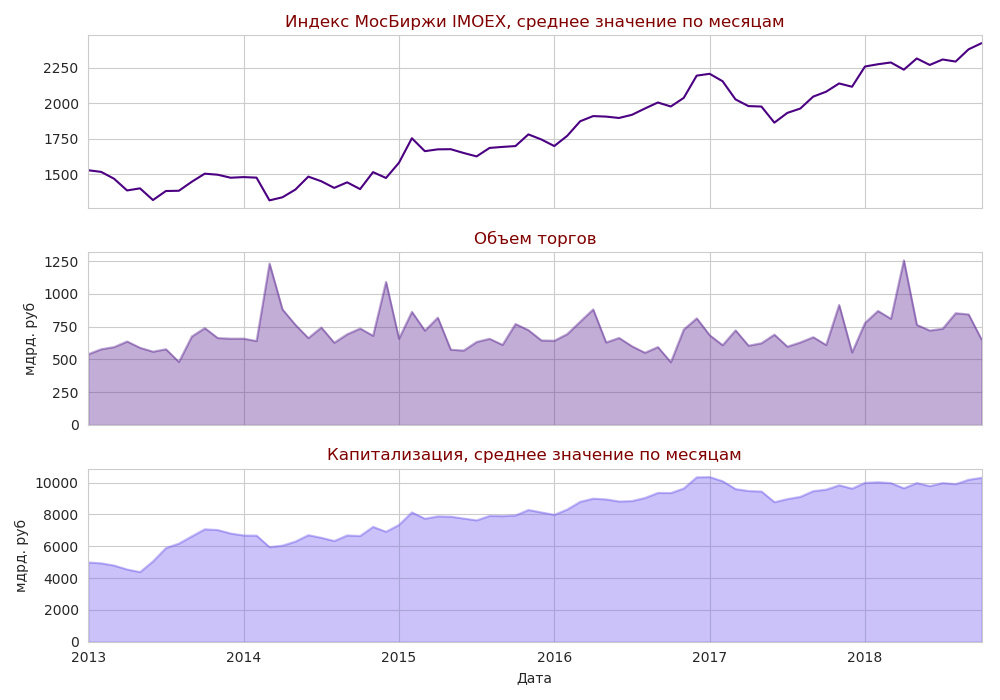

In [241]:
#%matplotlib notebook
#import matplotlib.patches as mpatches

import seaborn as sns
sns.set_style('whitegrid')

fig_mo, (ax_m1, ax_m2, ax_m3)=plt.subplots(figsize=(10,7), nrows=3, ncols=1, sharex=True)

lBaseYear_m=2013

moex_m_average.loc[moex_m_average.index.year>=lBaseYear_m].plot.line(ax=ax_m1, color='indigo')

moex_vol=moex_volume.loc[moex_volume.index.year>=lBaseYear_m, ('VALUE')]/1e9
moex_vol.plot.area(ax=ax_m2, color='rebeccapurple', alpha=0.4)

moex_cap=moex_volume.loc[moex_volume.index.year>=lBaseYear_m, ('CAPITALIZATION')]/1e9
moex_cap.plot.area(ax=ax_m3, xlim=(pd.Timestamp('{year}-01-01'.format(year=lBaseYear_m)), datetime.now()), 
                   color='mediumslateblue', alpha=0.4)

ax_m1.set_title('Индекс МосБиржи IMOEX, среднее значение по месяцам', fontsize=12, color='maroon')
ax_m2.set_title('Объем торгов', fontsize=12, color='maroon')
ax_m3.set_title('Капитализация, среднее значение по месяцам', fontsize=12, color='maroon')

ax_m3.set_xlabel('Дата')
ax_m2.set_ylabel('мдрд. руб')
ax_m3.set_ylabel('мдрд. руб')

plt.tight_layout()
plt.show();
plt.savefig(r'/home/egor/Изображения/IMOEX.png')